In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import LinearIVGMM
import matplotlib.pyplot as plt

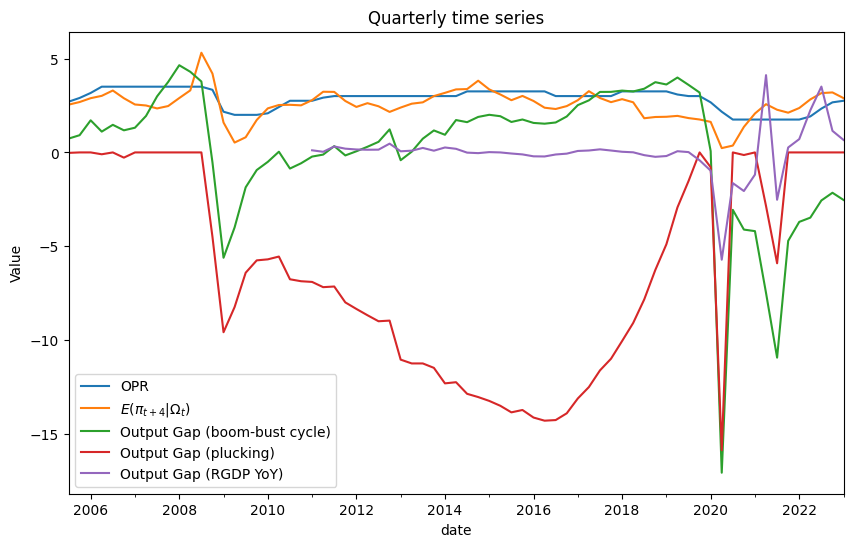

In [2]:
# Data visualisation

data = pd.read_parquet("data_infx.parquet")
# Select the columns to plot
columns_to_plot = ['infx_analyst', 'output_gap_plucking', 'output_gap_bb_avg', 'output_gap_rgdp_yoy', 'opr']

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6)) 

# Plot the data and customize the legend labels
data['opr'].plot(ax=ax, label='OPR')
data['infx_analyst'].plot(ax=ax, label='$E(\pi_{t+4}|\Omega_{t})$')
data['output_gap_bb_avg'].plot(ax=ax, label='Output Gap (boom-bust cycle)')
data['output_gap_plucking'].plot(ax=ax, label='Output Gap (plucking)')
data['output_gap_rgdp_yoy'].plot(ax=ax, label='Output Gap (RGDP YoY)')


# Set the plot title and axis labels
ax.set_title('Quarterly time series')
ax.set_ylabel('Value')

# Display the legend
ax.legend()

# Show the plot
plt.show()


In [3]:
# OLS using infx_analyst



# output_gap_plucking
X = sm.add_constant(data[['infx_analyst_dev', 'output_gap_plucking', 'opr_lag']])
model = sm.OLS(data['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_plucking = coefficients['output_gap_plucking']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_plucking / (1 - alpha)
results_table_ols_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_plucking['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_plucking'] / (1 - alpha)]
results_table_ols_plucking['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_plucking']]



# output_gap_bb_avg
X = sm.add_constant(data[['infx_analyst_dev', 'output_gap_bb_avg', 'opr_lag']])
model = sm.OLS(data['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_bb_avg = coefficients['output_gap_bb_avg']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_bb_avg / (1 - alpha)
results_table_ols_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_bb['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_bb_avg'] / (1 - alpha)]
results_table_ols_bb['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_bb_avg']]



# output_gap_rgdp
data1 = data.dropna(subset=['output_gap_rgdp_yoy'])
X = sm.add_constant(data1[['infx_analyst_dev', 'output_gap_rgdp_yoy', 'opr_lag']])
model = sm.OLS(data1['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_rgdp_yoy = coefficients['output_gap_rgdp_yoy']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_bb_avg / (1 - alpha)
results_table_ols_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_rgdp['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_rgdp_yoy'] / (1 - alpha)]
results_table_ols_rgdp['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_rgdp_yoy']]





# IV-GMM using infx_analyst



# output_gap_plucking
exog = np.column_stack((np.ones_like(data['opr_lag']), data['infx_analyst_dev'], data['output_gap_plucking'], data['opr_lag']))
endog = data['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data['output_gap_plucking'], 1)[2:]
instruments_2 = np.roll(data['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data['output_gap_plucking'], 2)[2:]
instruments_5 = np.roll(data['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
results_table_gmm_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_plucking['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_plucking['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]



# output_gap_bb_avg
exog = np.column_stack((np.ones_like(data['opr_lag']), data['infx_analyst_dev'], data['output_gap_bb_avg'], data['opr_lag']))
endog = data['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data['output_gap_bb_avg'], 1)[2:]
instruments_2 = np.roll(data['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data['output_gap_bb_avg'], 2)[2:]
instruments_5 = np.roll(data['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_bb_avg = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_bb_avg / (1 - alpha)
results_table_gmm_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_bb['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_bb['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]



# output_gap_rgdp
exog = np.column_stack((np.ones_like(data1['opr_lag']), data1['infx_analyst_dev'], data1['output_gap_rgdp_yoy'], data1['opr_lag']))
endog = data1['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data1['output_gap_rgdp_yoy'], 1)[2:]
instruments_2 = np.roll(data1['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data1['output_gap_rgdp_yoy'], 2)[2:]
instruments_5 = np.roll(data1['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_rgdp_yoy = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_rgdp_yoy / (1 - alpha)
results_table_gmm_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_rgdp['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_rgdp['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

In [4]:
# Sensitivity analysis using actual inflation at time t

# Get CPI index data
data_cpi = pd.read_parquet("data_inf.parquet")

# OLS
data_cpi1 = data_cpi.dropna(subset=['output_gap_plucking'])
X = sm.add_constant(data_cpi1[['inf_dev', 'output_gap_plucking', 'opr_lag']])
model = sm.OLS(data_cpi1['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_inf_dev = coefficients['inf_dev']
coef_output_gap = coefficients['output_gap_plucking']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_inf_dev / (1 - alpha)
gamma = coef_output_gap / (1 - alpha)
results_table_ols_inf_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf_plucking['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_dev'] / (1 - alpha), results.bse['output_gap_plucking'] / (1 - alpha)]
results_table_ols_inf_plucking['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_dev'], results.pvalues['output_gap_plucking']]

data_cpi2 = data_cpi.dropna(subset=['output_gap_bb_avg'])
X = sm.add_constant(data_cpi2[['inf_dev', 'output_gap_bb_avg', 'opr_lag']])
model = sm.OLS(data_cpi2['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_inf_dev = coefficients['inf_dev']
coef_output_gap = coefficients['output_gap_bb_avg']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_inf_dev / (1 - alpha)
gamma = coef_output_gap / (1 - alpha)
results_table_ols_inf_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf_bb['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_dev'] / (1 - alpha), results.bse['output_gap_bb_avg'] / (1 - alpha)]
results_table_ols_inf_bb['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_dev'], results.pvalues['output_gap_bb_avg']]


data_cpi3 = data_cpi.dropna(subset=['output_gap_rgdp_yoy'])
X = sm.add_constant(data_cpi3[['inf_dev', 'output_gap_rgdp_yoy', 'opr_lag']])
model = sm.OLS(data_cpi3['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['inf_dev']
coef_output_rgdp_yoy = coefficients['output_gap_rgdp_yoy']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_rgdp_yoy / (1 - alpha)
results_table_ols_inf_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf_rgdp['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_dev'] / (1 - alpha), results.bse['output_gap_rgdp_yoy'] / (1 - alpha)]
results_table_ols_inf_rgdp['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_dev'], results.pvalues['output_gap_rgdp_yoy']]



# GMM
exog = np.column_stack((np.ones_like(data_cpi1['opr_lag']), data_cpi1['inf_dev'], data_cpi1['output_gap_plucking'], data_cpi1['opr_lag']))
endog = data_cpi1['opr']
instruments = np.roll(endog, 1)[2:]
instruments_1 = np.roll(data_cpi1['output_gap_plucking'], 1)[2:]
instruments_2 = np.roll(data_cpi1['inf'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]
instruments_4 = np.roll(data_cpi1['output_gap_plucking'], 2)[2:]
instruments_5 = np.roll(data_cpi1['inf'], 2)[2:]
constant = np.ones_like(endog)[2:] 
endog = endog[2:] 
exog = exog[2:] 
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant)) 
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
results_table_gmm_inf_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf_plucking['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf_plucking['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_cpi2['opr_lag']), data_cpi2['inf_dev'], data_cpi2['output_gap_bb_avg'], data_cpi2['opr_lag']))
endog = data_cpi2['opr']
instruments = np.roll(endog, 1)[2:]  
instruments_1 = np.roll(data_cpi2['output_gap_bb_avg'], 1)[2:]
instruments_2 = np.roll(data_cpi2['inf'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  
instruments_4 = np.roll(data_cpi2['output_gap_bb_avg'], 2)[2:]
instruments_5 = np.roll(data_cpi2['inf'], 2)[2:]
constant = np.ones_like(endog)[2:]  
endog = endog[2:]  
exog = exog[2:]  
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_bb_avg = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_bb_avg / (1 - alpha)
results_table_gmm_inf_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf_bb['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf_bb['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_cpi3['opr_lag']), data_cpi3['inf_dev'], data_cpi3['output_gap_rgdp_yoy'], data_cpi3['opr_lag']))
endog = data_cpi3['opr']
instruments = np.roll(endog, 1)[2:]  
instruments_1 = np.roll(data_cpi3['output_gap_rgdp_yoy'], 1)[2:]
instruments_2 = np.roll(data_cpi3['inf'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  
instruments_4 = np.roll(data_cpi3['output_gap_rgdp_yoy'], 2)[2:]
instruments_5 = np.roll(data_cpi3['inf'], 2)[2:]
constant = np.ones_like(endog)[2:]  
endog = endog[2:]  
exog = exog[2:]  
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_rgdp_yoy = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_rgdp_yoy / (1 - alpha)
results_table_gmm_inf_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf_rgdp['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf_rgdp['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

In [5]:
# Sensitivity analysis using inf3ma

# OLS
X = sm.add_constant(data_cpi1[['inf_3ma_dev', 'output_gap_plucking', 'opr_lag']])
model = sm.OLS(data_cpi1['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_inf_dev = coefficients['inf_3ma_dev']
coef_output_gap = coefficients['output_gap_plucking']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_inf_dev / (1 - alpha)
gamma = coef_output_gap / (1 - alpha)
results_table_ols_inf3ma_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf3ma_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf3ma_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf3ma_plucking['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_3ma_dev'] / (1 - alpha), results.bse['output_gap_plucking'] / (1 - alpha)]
results_table_ols_inf3ma_plucking['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_3ma_dev'], results.pvalues['output_gap_plucking']]

X = sm.add_constant(data_cpi2[['inf_3ma_dev', 'output_gap_bb_avg', 'opr_lag']])
model = sm.OLS(data_cpi2['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_inf_dev = coefficients['inf_3ma_dev']
coef_output_gap = coefficients['output_gap_bb_avg']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_inf_dev / (1 - alpha)
gamma = coef_output_gap / (1 - alpha)
results_table_ols_inf3ma_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf3ma_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf3ma_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf3ma_bb['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_3ma_dev'] / (1 - alpha), results.bse['output_gap_bb_avg'] / (1 - alpha)]
results_table_ols_inf3ma_bb['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_3ma_dev'], results.pvalues['output_gap_bb_avg']]

X = sm.add_constant(data_cpi3[['inf_3ma_dev', 'output_gap_rgdp_yoy', 'opr_lag']])
model = sm.OLS(data_cpi3['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['inf_3ma_dev']
coef_output_rgdp_yoy = coefficients['output_gap_rgdp_yoy']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_rgdp_yoy / (1 - alpha)
results_table_ols_inf3ma_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf3ma_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf3ma_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf3ma_rgdp['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_3ma_dev'] / (1 - alpha), results.bse['output_gap_rgdp_yoy'] / (1 - alpha)]
results_table_ols_inf3ma_rgdp['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_3ma_dev'], results.pvalues['output_gap_rgdp_yoy']]


# GMM
exog = np.column_stack((np.ones_like(data_cpi1['opr_lag']), data_cpi1['inf_3ma_dev'], data_cpi1['output_gap_plucking'], data_cpi1['opr_lag']))
endog = data_cpi1['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_cpi1['output_gap_plucking'], 1)[2:]
instruments_2 = np.roll(data_cpi1['inf_3ma'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_cpi1['output_gap_plucking'], 2)[2:]
instruments_5 = np.roll(data_cpi1['inf_3ma'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
results_table_gmm_inf3ma_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf3ma_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf3ma_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf3ma_plucking['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf3ma_plucking['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_cpi2['opr_lag']), data_cpi2['inf_3ma_dev'], data_cpi2['output_gap_bb_avg'], data_cpi2['opr_lag']))
endog = data_cpi2['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_cpi2['output_gap_bb_avg'], 1)[2:]
instruments_2 = np.roll(data_cpi2['inf_3ma'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_cpi2['output_gap_bb_avg'], 2)[2:]
instruments_5 = np.roll(data_cpi2['inf_3ma'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_bb_avg = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_bb_avg / (1 - alpha)
results_table_gmm_inf3ma_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf3ma_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf3ma_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf3ma_bb['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf3ma_bb['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_cpi3['opr_lag']), data_cpi3['inf_3ma_dev'], data_cpi3['output_gap_rgdp_yoy'], data_cpi3['opr_lag']))
endog = data_cpi3['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_cpi3['output_gap_rgdp_yoy'], 1)[2:]
instruments_2 = np.roll(data_cpi3['inf_3ma'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_cpi3['output_gap_rgdp_yoy'], 2)[2:]
instruments_5 = np.roll(data_cpi3['inf_3ma'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_rgdp_yoy = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_rgdp_yoy / (1 - alpha)
results_table_gmm_inf3ma_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf3ma_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf3ma_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf3ma_rgdp['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf3ma_rgdp['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

In [6]:
# Sensitivity analysis using inf5ma

# OLS
X = sm.add_constant(data_cpi1[['inf_5ma_dev', 'output_gap_plucking', 'opr_lag']])
model = sm.OLS(data_cpi1['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_inf_dev = coefficients['inf_5ma_dev']
coef_output_gap = coefficients['output_gap_plucking']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_inf_dev / (1 - alpha)
gamma = coef_output_gap / (1 - alpha)
results_table_ols_inf5ma_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf5ma_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf5ma_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf5ma_plucking['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_5ma_dev'] / (1 - alpha), results.bse['output_gap_plucking'] / (1 - alpha)]
results_table_ols_inf5ma_plucking['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_5ma_dev'], results.pvalues['output_gap_plucking']]

X = sm.add_constant(data_cpi2[['inf_5ma_dev', 'output_gap_bb_avg', 'opr_lag']])
model = sm.OLS(data_cpi2['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_inf_dev = coefficients['inf_5ma_dev']
coef_output_gap = coefficients['output_gap_bb_avg']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_inf_dev / (1 - alpha)
gamma = coef_output_gap / (1 - alpha)
results_table_ols_inf5ma_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf5ma_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf5ma_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf5ma_bb['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_5ma_dev'] / (1 - alpha), results.bse['output_gap_bb_avg'] / (1 - alpha)]
results_table_ols_inf5ma_bb['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_5ma_dev'], results.pvalues['output_gap_bb_avg']]

X = sm.add_constant(data_cpi3[['inf_5ma_dev', 'output_gap_rgdp_yoy', 'opr_lag']])
model = sm.OLS(data_cpi3['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['inf_5ma_dev']
coef_output_rgdp_yoy = coefficients['output_gap_rgdp_yoy']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_rgdp_yoy / (1 - alpha)
results_table_ols_inf5ma_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_inf5ma_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_inf5ma_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_inf5ma_rgdp['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['inf_5ma_dev'] / (1 - alpha), results.bse['output_gap_rgdp_yoy'] / (1 - alpha)]
results_table_ols_inf5ma_rgdp['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['inf_5ma_dev'], results.pvalues['output_gap_rgdp_yoy']]

# GMM
exog = np.column_stack((np.ones_like(data_cpi1['opr_lag']), data_cpi1['inf_5ma_dev'], data_cpi1['output_gap_plucking'], data_cpi1['opr_lag']))
endog = data_cpi1['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_cpi1['output_gap_plucking'], 1)[2:]
instruments_2 = np.roll(data_cpi1['inf_5ma'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_cpi1['output_gap_plucking'], 2)[2:]
instruments_5 = np.roll(data_cpi1['inf_5ma'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
results_table_gmm_inf5ma_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf5ma_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf5ma_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf5ma_plucking['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf5ma_plucking['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_cpi2['opr_lag']), data_cpi2['inf_5ma_dev'], data_cpi2['output_gap_bb_avg'], data_cpi2['opr_lag']))
endog = data_cpi2['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_cpi2['output_gap_bb_avg'], 1)[2:]
instruments_2 = np.roll(data_cpi2['inf_5ma'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_cpi2['output_gap_bb_avg'], 2)[2:]
instruments_5 = np.roll(data_cpi2['inf_5ma'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_bb_avg = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_bb_avg / (1 - alpha)
results_table_gmm_inf5ma_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf5ma_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf5ma_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf5ma_bb['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf5ma_bb['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_cpi3['opr_lag']), data_cpi3['inf_5ma_dev'], data_cpi3['output_gap_rgdp_yoy'], data_cpi3['opr_lag']))
endog = data_cpi3['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_cpi3['output_gap_rgdp_yoy'], 1)[2:]
instruments_2 = np.roll(data_cpi3['inf_5ma'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_cpi3['output_gap_rgdp_yoy'], 2)[2:]
instruments_5 = np.roll(data_cpi3['inf_5ma'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_rgdp_yoy = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_rgdp_yoy / (1 - alpha)
results_table_gmm_inf5ma_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_inf5ma_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_inf5ma_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_inf5ma_rgdp['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_inf5ma_rgdp['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

In [7]:
# Robustness checks for crisis period

# Create crisis dummy variable
data['crisis'] = 0
# Define the crisis periods
financial_crisis_period = pd.date_range(start='2007-07-01', end='2009-01-01')
covid_crisis_period = pd.date_range(start='2019-10-01', end='2023-06-01')
# Set the "crisis" column to 1 for the corresponding crisis periods
data.loc[data.index.isin(financial_crisis_period) | data.index.isin(covid_crisis_period), 'crisis'] = 1
# Create the interaction terms
data['crisis_infx_dev'] = data['crisis'] * data['infx_analyst_dev']
data['crisis_plucking'] = data['crisis'] * data['output_gap_plucking']
data['crisis_bb'] = data['crisis'] * data['output_gap_bb_avg']
data['crisis_rgdp'] = data['crisis'] * data['output_gap_rgdp_yoy']
# Create crisis dummy variable
data1['crisis'] = 0
# Define the crisis periods
financial_crisis_period = pd.date_range(start='2007-07-01', end='2009-01-01')
covid_crisis_period = pd.date_range(start='2019-10-01', end='2023-06-01')
# Set the "crisis" column to 1 for the corresponding crisis periods
data1.loc[data1.index.isin(financial_crisis_period) | data1.index.isin(covid_crisis_period), 'crisis'] = 1
# Create the interaction terms
data1['crisis_infx_dev'] = data1['crisis'] * data1['infx_analyst_dev']
data1['crisis_plucking'] = data1['crisis'] * data1['output_gap_plucking']
data1['crisis_bb'] = data1['crisis'] * data1['output_gap_bb_avg']
data1['crisis_rgdp'] = data1['crisis'] * data1['output_gap_rgdp_yoy']




# OLS
X = sm.add_constant(data[['infx_analyst_dev', 'output_gap_plucking', 'opr_lag', 'crisis']])
model = sm.OLS(data['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_plucking = coefficients['output_gap_plucking']
coef_opr_lag = coefficients['opr_lag']
coef_crisis = coefficients['crisis']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_plucking / (1 - alpha)
delta = coef_crisis / (1 - alpha)
results_table_ols_crisis_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_crisis_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma', 'delta']
results_table_ols_crisis_plucking['Estimated Value'] = [alpha, r, beta, gamma, delta]
results_table_ols_crisis_plucking['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_plucking'] / (1 - alpha), results.bse['crisis'] / (1 - alpha)]
results_table_ols_crisis_plucking['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_plucking'], results.pvalues['crisis']]

X = sm.add_constant(data[['infx_analyst_dev', 'output_gap_bb_avg', 'opr_lag', 'crisis']])
model = sm.OLS(data['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_plucking = coefficients['output_gap_bb_avg']
coef_opr_lag = coefficients['opr_lag']
coef_crisis = coefficients['crisis']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_plucking / (1 - alpha)
delta = coef_crisis / (1 - alpha)
results_table_ols_crisis_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_crisis_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma', 'delta']
results_table_ols_crisis_bb['Estimated Value'] = [alpha, r, beta, gamma, delta]
results_table_ols_crisis_bb['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_bb_avg'] / (1 - alpha), results.bse['crisis'] / (1 - alpha)]
results_table_ols_crisis_bb['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_bb_avg'], results.pvalues['crisis']]

X = sm.add_constant(data1[['infx_analyst_dev', 'output_gap_rgdp_yoy', 'opr_lag', 'crisis']])
model = sm.OLS(data1['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_plucking = coefficients['output_gap_rgdp_yoy']
coef_opr_lag = coefficients['opr_lag']
coef_crisis = coefficients['crisis']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_plucking / (1 - alpha)
delta = coef_crisis / (1 - alpha)
results_table_ols_crisis_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_crisis_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma', 'delta']
results_table_ols_crisis_rgdp['Estimated Value'] = [alpha, r, beta, gamma, delta]
results_table_ols_crisis_rgdp['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_rgdp_yoy'] / (1 - alpha), results.bse['crisis'] / (1 - alpha)]
results_table_ols_crisis_rgdp['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_rgdp_yoy'], results.pvalues['crisis']]

# GMM
exog = np.column_stack((np.ones_like(data['opr_lag']), data['infx_analyst_dev'], data['output_gap_plucking'], data['opr_lag'], data['crisis']))
endog = data['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data['output_gap_plucking'], 1)[2:]
instruments_2 = np.roll(data['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data['output_gap_plucking'], 2)[2:]
instruments_5 = np.roll(data['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
coef_crisis = coefficients[4]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
delta = coef_crisis / (1 - alpha)
results_table_gmm_crisis_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_crisis_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma', 'delta']
results_table_gmm_crisis_plucking['Estimated Value'] = [alpha, r, beta, gamma, delta]
results_table_gmm_crisis_plucking['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha), gmm_results.bse[3] / (1 - alpha)]
results_table_gmm_crisis_plucking['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2], gmm_results.pvalues[3]]

exog = np.column_stack((np.ones_like(data['opr_lag']), data['infx_analyst_dev'], data['output_gap_bb_avg'], data['opr_lag'], data['crisis']))
endog = data['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data['output_gap_bb_avg'], 1)[2:]
instruments_2 = np.roll(data['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data['output_gap_bb_avg'], 2)[2:]
instruments_5 = np.roll(data['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
coef_crisis = coefficients[4]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
delta = coef_crisis / (1 - alpha)
results_table_gmm_crisis_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_crisis_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma', 'delta']
results_table_gmm_crisis_bb['Estimated Value'] = [alpha, r, beta, gamma, delta]
results_table_gmm_crisis_bb['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha), gmm_results.bse[3] / (1 - alpha)]
results_table_gmm_crisis_bb['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2], gmm_results.pvalues[3]]

exog = np.column_stack((np.ones_like(data1['opr_lag']), data1['infx_analyst_dev'], data1['output_gap_rgdp_yoy'], data1['opr_lag'], data1['crisis']))
endog = data1['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data1['output_gap_rgdp_yoy'], 1)[2:]
instruments_2 = np.roll(data1['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data1['output_gap_rgdp_yoy'], 2)[2:]
instruments_5 = np.roll(data1['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
coef_crisis = coefficients[4]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
delta = coef_crisis / (1 - alpha)
results_table_gmm_crisis_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_crisis_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma', 'delta']
results_table_gmm_crisis_rgdp['Estimated Value'] = [alpha, r, beta, gamma, delta]
results_table_gmm_crisis_rgdp['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha), gmm_results.bse[3] / (1 - alpha)]
results_table_gmm_crisis_rgdp['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2], gmm_results.pvalues[3]]

/tmp/ipykernel_2804779/8950613.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['crisis'] = 0
/tmp/ipykernel_2804779/8950613.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['crisis_infx_dev'] = data1['crisis'] * data1['infx_analyst_dev']
/tmp/ipykernel_2804779/8950613.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [8]:
# Robustness checks using only pre-covid data

# OLS

# Define the COVID-19 crisis period
covid_crisis_period = pd.date_range(start='2019-10-01', end='2023-07-01')
# Create a new DataFrame excluding the COVID-19 crisis period
data_pre_covid = data[~data.index.isin(covid_crisis_period)]
X = sm.add_constant(data_pre_covid[['infx_analyst_dev', 'output_gap_plucking', 'opr_lag']])
model = sm.OLS(data_pre_covid['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_bb_avg = coefficients['output_gap_plucking']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_bb_avg / (1 - alpha)
results_table_ols_pre_covid_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_pre_covid_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_pre_covid_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_pre_covid_plucking['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_plucking'] / (1 - alpha)]
results_table_ols_pre_covid_plucking['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_plucking']]

X = sm.add_constant(data_pre_covid[['infx_analyst_dev', 'output_gap_bb_avg', 'opr_lag']])
model = sm.OLS(data_pre_covid['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_bb_avg = coefficients['output_gap_bb_avg']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_bb_avg / (1 - alpha)
results_table_ols_pre_covid_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_pre_covid_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_pre_covid_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_pre_covid_bb['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_bb_avg'] / (1 - alpha)]
results_table_ols_pre_covid_bb['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_bb_avg']]

# Define the COVID-19 crisis period
covid_crisis_period = pd.date_range(start='2019-10-01', end='2023-07-01')
# Create a new DataFrame excluding the COVID-19 crisis period
data1_pre_covid = data1[~data1.index.isin(covid_crisis_period)]
X = sm.add_constant(data1_pre_covid[['infx_analyst_dev', 'output_gap_rgdp_yoy', 'opr_lag']])
model = sm.OLS(data1_pre_covid['opr'], exog=X)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
coefficients = results.params
coef_const = coefficients['const']
coef_infx_analyst_dev = coefficients['infx_analyst_dev']
coef_output_rgdp_yoy = coefficients['output_gap_rgdp_yoy']
coef_opr_lag = coefficients['opr_lag']
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_bb_avg / (1 - alpha)
results_table_ols_pre_covid_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_ols_pre_covid_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_ols_pre_covid_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_ols_pre_covid_rgdp['Standard Error'] = [results.bse['opr_lag'], results.bse['const'] / (1 - alpha), results.bse['infx_analyst_dev'] / (1 - alpha), results.bse['output_gap_rgdp_yoy'] / (1 - alpha)]
results_table_ols_pre_covid_rgdp['P-value'] = [results.pvalues['opr_lag'], results.pvalues['const'], results.pvalues['infx_analyst_dev'], results.pvalues['output_gap_rgdp_yoy']]

# GMM
exog = np.column_stack((np.ones_like(data_pre_covid['opr_lag']), data_pre_covid['infx_analyst_dev'], data_pre_covid['output_gap_plucking'], data_pre_covid['opr_lag']))
endog = data_pre_covid['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_pre_covid['output_gap_plucking'], 1)[2:]
instruments_2 = np.roll(data_pre_covid['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_pre_covid['output_gap_plucking'], 2)[2:]
instruments_5 = np.roll(data_pre_covid['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_plucking = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_plucking / (1 - alpha)
results_table_gmm_pre_covid_plucking = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_pre_covid_plucking['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_pre_covid_plucking['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_pre_covid_plucking['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_pre_covid_plucking['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data_pre_covid['opr_lag']), data_pre_covid['infx_analyst_dev'], data_pre_covid['output_gap_bb_avg'], data_pre_covid['opr_lag']))
endog = data_pre_covid['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data_pre_covid['output_gap_bb_avg'], 1)[2:]
instruments_2 = np.roll(data_pre_covid['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data_pre_covid['output_gap_bb_avg'], 2)[2:]
instruments_5 = np.roll(data_pre_covid['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()
coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_bb_avg = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_bb_avg / (1 - alpha)
results_table_gmm_pre_covid_bb = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_pre_covid_bb['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_pre_covid_bb['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_pre_covid_bb['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_pre_covid_bb['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

exog = np.column_stack((np.ones_like(data1_pre_covid['opr_lag']), data1_pre_covid['infx_analyst_dev'], data1_pre_covid['output_gap_rgdp_yoy'], data1_pre_covid['opr_lag']))
endog = data1_pre_covid['opr']
instruments = np.roll(endog, 1)[2:]  # Lagged dependent variable as an instrument
instruments_1 = np.roll(data1_pre_covid['output_gap_rgdp_yoy'], 1)[2:]
instruments_2 = np.roll(data1_pre_covid['infx_analyst'], 1)[2:]
instruments_3 = np.roll(endog, 2)[2:]  # Lagged dependent variable as an instrument
instruments_4 = np.roll(data1_pre_covid['output_gap_rgdp_yoy'], 2)[2:]
instruments_5 = np.roll(data1_pre_covid['infx_analyst'], 2)[2:]
constant = np.ones_like(endog)[2:]  # Constant as an instrument
endog = endog[2:]  # Remove the first row to match the length of instruments
exog = exog[2:]  # Remove the first row to match the length of instruments
instruments = np.column_stack((instruments, instruments_1, instruments_2, instruments_3, instruments_4, instruments_5 ,constant))  # Combine instruments
gmm_model = LinearIVGMM(endog, exog, instrument=instruments)
gmm_results = gmm_model.fit()

coefficients = gmm_results.params
coef_const = coefficients[0]
coef_infx_analyst_dev = coefficients[1]
coef_output_gap_rgdp_yoy = coefficients[2]
coef_opr_lag = coefficients[3]
alpha = coef_opr_lag
r = coef_const / (1 - alpha)
beta = coef_infx_analyst_dev / (1 - alpha)
gamma = coef_output_gap_rgdp_yoy / (1 - alpha)
results_table_gmm_pre_covid_rgdp = pd.DataFrame(columns=['Coefficient', 'Estimated Value', 'Standard Error', 'P-value'])
results_table_gmm_pre_covid_rgdp['Coefficient'] = ['alpha', 'r', 'beta', 'gamma']
results_table_gmm_pre_covid_rgdp['Estimated Value'] = [alpha, r, beta, gamma]
results_table_gmm_pre_covid_rgdp['Standard Error'] = [gmm_results.bse[3], gmm_results.bse[0] / (1 - alpha), gmm_results.bse[1] / (1 - alpha), gmm_results.bse[2] / (1 - alpha)]
results_table_gmm_pre_covid_rgdp['P-value'] = [gmm_results.pvalues[3], gmm_results.pvalues[0], gmm_results.pvalues[1], gmm_results.pvalues[2]]

In [9]:
# Table 1
# Consolidate main analysis results

# Combine all results table
merged_results_table = pd.concat([results_table_ols_plucking, results_table_gmm_plucking, results_table_ols_bb, results_table_gmm_bb, results_table_ols_rgdp, results_table_gmm_rgdp], ignore_index=True)
# Create labels for the models
ols_plucking_label = 'OLS (Plucking)'
gmm_plucking_label = 'GMM (Plucking)'
ols_bb_label = 'OLS (BB)'
gmm_bb_label = 'GMM (BB)'
ols_rgdp_label = 'OLS (RGDP)' 
gmm_rgdp_label = 'GMM (RGDP)'  
# Create a new column for model labels
model_labels = [ols_plucking_label] * len(results_table_ols_plucking) + [gmm_plucking_label] * len(results_table_gmm_plucking) + [ols_bb_label] * len(results_table_ols_bb) + [gmm_bb_label] * len(results_table_gmm_bb) + [ols_rgdp_label] * len(results_table_ols_rgdp) + [gmm_rgdp_label] * len(results_table_gmm_rgdp)
# Add the new column to the merged results table
merged_results_table.insert(0, 'Model', model_labels)
# Add a row to showcase the significance based on p-values
merged_results_table['Significance'] = merged_results_table['P-value'].apply(lambda p: '***' if p < 0.01 else '**' if p < 0.05 else '*' if p < 0.1 else '')

# Round the values in the "Estimated Value" column to 3 significant figures
main_analysis_table = merged_results_table.copy()
main_analysis_table["Estimated Value"] = main_analysis_table["Estimated Value"].round(3)
main_analysis_table["Standard Error"] = main_analysis_table["Standard Error"].round(3)

for i, row in main_analysis_table.iterrows():
    main_analysis_table.at[i, "Estimated Value"] = f"{row['Estimated Value']} {row['Significance']}"
    main_analysis_table.at[i, "Significance"] = ''

# Drop the "Significance" and "P-value" columns
main_analysis_table.drop(columns=["Significance", "P-value"], inplace=True)


# Iterate over each row of the main_analysis_table
for index, row in main_analysis_table.iterrows():
    # Get the Model name
    model = row["Model"]
    # Iterate over the columns and find the corresponding Standard Error
    for col in main_analysis_table.columns:
        if col.endswith("Standard Error"):
            standard_error_col = col
            break
    # Update the Estimated Value with Standard Error
    main_analysis_table.at[index, "Estimated Value"] += " (" + str(row[standard_error_col]) + ")"

# Drop the Standard Error columns
main_analysis_table.drop(columns=main_analysis_table.filter(like="Standard Error").columns, inplace=True)

# Pivot the table
main_analysis_table = main_analysis_table.pivot(index="Coefficient", columns="Model", values=["Estimated Value"])

main_analysis_table

Estimated Value                                       \
Model                 GMM (BB)     GMM (Plucking)        GMM (RGDP)   
Coefficient                                                           
alpha        0.527 *** (0.097)  0.909 *** (0.046)  0.94 *** (0.042)   
beta         0.268 *** (0.065)  1.883 *** (0.341)  2.62 *** (0.951)   
gamma         0.167 *** (0.04)      0.038  (0.04)    -0.418  (0.65)   
r            2.686 *** (0.556)     2.259  (1.494)    1.201  (1.707)   

                                                                      
Model                 OLS (BB)     OLS (Plucking)         OLS (RGDP)  
Coefficient                                                           
alpha        0.722 *** (0.088)  0.856 *** (0.053)  0.926 *** (0.028)  
beta         0.425 *** (0.104)  1.045 *** (0.299)  1.779 *** (0.419)  
gamma         0.119 ** (0.053)      0.031  (0.02)      0.447  (0.24)  
r            2.608 *** (0.859)  2.484 *** (0.935)    1.889 * (1.065)

In [10]:
# Table 2
# Calculate average values

alpha_avg = merged_results_table[merged_results_table['Coefficient'] == 'alpha']['Estimated Value'].mean()
beta_avg = merged_results_table[merged_results_table['Coefficient'] == 'beta']['Estimated Value'].mean()
gamma_avg = merged_results_table[merged_results_table['Coefficient'] == 'gamma']['Estimated Value'].mean()
r_avg = merged_results_table[merged_results_table['Coefficient'] == 'r']['Estimated Value'].mean()
# Create a new DataFrame for the average values
avg_values = pd.DataFrame({'coefficients': ['alpha', 'beta', 'gamma', 'r'], 'avg': [alpha_avg, beta_avg, gamma_avg, r_avg]})

# Calculate average values for plucking coefficients
alpha_plucking_avg = merged_results_table[(merged_results_table['Coefficient'] == 'alpha') & (merged_results_table['Model'].str.contains('Plucking'))]['Estimated Value'].mean()
beta_plucking_avg = merged_results_table[(merged_results_table['Coefficient'] == 'beta') & (merged_results_table['Model'].str.contains('Plucking'))]['Estimated Value'].mean()
gamma_plucking_avg = merged_results_table[(merged_results_table['Coefficient'] == 'gamma') & (merged_results_table['Model'].str.contains('Plucking'))]['Estimated Value'].mean()
r_plucking_avg = merged_results_table[(merged_results_table['Coefficient'] == 'r') & (merged_results_table['Model'].str.contains('Plucking'))]['Estimated Value'].mean()
avg_values['avg_plucking'] = [alpha_plucking_avg, beta_plucking_avg, gamma_plucking_avg, r_plucking_avg]

# Calculate average values for bb coefficients
alpha_bb_avg = merged_results_table[(merged_results_table['Coefficient'] == 'alpha') & (merged_results_table['Model'].str.contains('BB'))]['Estimated Value'].mean()
beta_bb_avg = merged_results_table[(merged_results_table['Coefficient'] == 'beta') & (merged_results_table['Model'].str.contains('BB'))]['Estimated Value'].mean()
gamma_bb_avg = merged_results_table[(merged_results_table['Coefficient'] == 'gamma') & (merged_results_table['Model'].str.contains('BB'))]['Estimated Value'].mean()
r_bb_avg = merged_results_table[(merged_results_table['Coefficient'] == 'r') & (merged_results_table['Model'].str.contains('BB'))]['Estimated Value'].mean()
avg_values['avg_bb'] = [alpha_bb_avg, beta_bb_avg, gamma_bb_avg, r_bb_avg]

# Calculate average values for rgdp coefficients
alpha_rgdp_avg = merged_results_table[(merged_results_table['Coefficient'] == 'alpha') & (merged_results_table['Model'].str.contains('RGDP'))]['Estimated Value'].mean()
beta_rgdp_avg = merged_results_table[(merged_results_table['Coefficient'] == 'beta') & (merged_results_table['Model'].str.contains('RGDP'))]['Estimated Value'].mean()
gamma_rgdp_avg = merged_results_table[(merged_results_table['Coefficient'] == 'gamma') & (merged_results_table['Model'].str.contains('RGDP'))]['Estimated Value'].mean()
r_rgdp_avg = merged_results_table[(merged_results_table['Coefficient'] == 'r') & (merged_results_table['Model'].str.contains('RGDP'))]['Estimated Value'].mean()
avg_values['avg_rgdp'] = [alpha_rgdp_avg, beta_rgdp_avg, gamma_rgdp_avg, r_rgdp_avg]

# Round the values in the "Estimated Value" column to 3 significant figures
avg_values["avg"] = avg_values["avg"].round(3)
avg_values["avg_plucking"] = avg_values["avg_plucking"].round(3)
avg_values["avg_bb"] = avg_values["avg_bb"].round(3)
avg_values["avg_rgdp"] = avg_values["avg_rgdp"].round(3)

avg_values

,coefficients,avg,avg_plucking,avg_bb,avg_rgdp
0,alpha,0.814,0.883,0.625,0.933
1,beta,1.337,1.464,0.346,2.200
2,gamma,0.064,0.034,0.143,0.014
3,r,2.188,2.372,2.647,1.545


In [11]:
# Table 3
# Consolidate sensitivity analysis results

sensitivity_results_table = pd.concat([ results_table_ols_inf_plucking, results_table_gmm_inf_plucking, 
                                   results_table_ols_inf3ma_plucking, results_table_gmm_inf3ma_plucking, 
                                   results_table_ols_inf5ma_plucking, results_table_gmm_inf5ma_plucking, 
                                   results_table_ols_inf_bb, results_table_gmm_inf_bb, 
                                   results_table_ols_inf3ma_bb, results_table_gmm_inf3ma_bb, 
                                   results_table_ols_inf5ma_bb, results_table_gmm_inf5ma_bb, 
                                   results_table_ols_inf_rgdp, results_table_gmm_inf_rgdp, 
                                   results_table_ols_inf3ma_rgdp, results_table_gmm_inf3ma_rgdp, 
                                   results_table_ols_inf5ma_rgdp, results_table_gmm_inf5ma_rgdp], 
                                  ignore_index=True)

# Create labels for the models
ols_inf_plucking_label = 'OLS (Inf - Plucking)'
gmm_inf_plucking_label = 'GMM (Inf - Plucking)'
ols_inf3ma_plucking_label = 'OLS (Inf3ma - Plucking)'
gmm_inf3ma_plucking_label = 'GMM (Inf3ma - Plucking)'
ols_inf5ma_plucking_label = 'OLS (Inf5ma - Plucking)'
gmm_inf5ma_plucking_label = 'GMM (Inf5ma - Plucking)'
ols_inf_bb_label = 'OLS (Inf - BB)'
gmm_inf_bb_label = 'GMM (Inf - BB)'
ols_inf3ma_bb_label = 'OLS (Inf3ma - BB)'
gmm_inf3ma_bb_label = 'GMM (Inf3ma - BB)'
ols_inf5ma_bb_label = 'OLS (Inf5ma - BB)'
gmm_inf5ma_bb_label = 'GMM (Inf5ma - BB)'
ols_inf_rgdp_label = 'OLS (Inf - RGDP)'
gmm_inf_rgdp_label = 'GMM (Inf - RGDP)'
ols_inf3ma_rgdp_label = 'OLS (Inf3ma - RGDP)'
gmm_inf3ma_rgdp_label = 'GMM (Inf3ma - RGDP)'
ols_inf5ma_rgdp_label = 'OLS (Inf5ma - RGDP)'
gmm_inf5ma_rgdp_label = 'GMM (Inf5ma - RGDP)'

# Create a new column for model labels
model_labels = ([ols_inf_plucking_label] * len(results_table_ols_inf_plucking) + 
               [gmm_inf_plucking_label] * len(results_table_gmm_inf_plucking) + 
               [ols_inf3ma_plucking_label] * len(results_table_ols_inf3ma_plucking) + 
               [gmm_inf3ma_plucking_label] * len(results_table_gmm_inf3ma_plucking) + 
               [ols_inf5ma_plucking_label] * len(results_table_ols_inf5ma_plucking) + 
               [gmm_inf5ma_plucking_label] * len(results_table_gmm_inf5ma_plucking) + 
               [ols_inf_bb_label] * len(results_table_ols_inf_bb) + 
               [gmm_inf_bb_label] * len(results_table_gmm_inf_bb) + 
               [ols_inf3ma_bb_label] * len(results_table_ols_inf3ma_bb) + 
               [gmm_inf3ma_bb_label] * len(results_table_gmm_inf3ma_bb) + 
               [ols_inf5ma_bb_label] * len(results_table_ols_inf5ma_bb) + 
               [gmm_inf5ma_bb_label] * len(results_table_gmm_inf5ma_bb) + 
               [ols_inf_rgdp_label] * len(results_table_ols_inf_rgdp) + 
               [gmm_inf_rgdp_label] * len(results_table_gmm_inf_rgdp) + 
               [ols_inf3ma_rgdp_label] * len(results_table_ols_inf3ma_rgdp) + 
               [gmm_inf3ma_rgdp_label] * len(results_table_gmm_inf3ma_rgdp) + 
               [ols_inf5ma_rgdp_label] * len(results_table_ols_inf5ma_rgdp) + 
               [gmm_inf5ma_rgdp_label] * len(results_table_gmm_inf5ma_rgdp))

# Add the new column to the merged results table
sensitivity_results_table.insert(0, 'Model', model_labels)

# Add a row to showcase the significance based on p-values
sensitivity_results_table['Significance'] = sensitivity_results_table['P-value'].apply(lambda p: '***' if p < 0.01 else '**' if p < 0.05 else '*' if p < 0.1 else '')


# Round the values in the "Estimated Value" column to 3 significant figures
sensitivity_results_table["Estimated Value"] = sensitivity_results_table["Estimated Value"].round(3)
sensitivity_results_table["Standard Error"] = sensitivity_results_table["Standard Error"].round(3)

for i, row in sensitivity_results_table.iterrows():
    sensitivity_results_table.at[i, "Estimated Value"] = f"{row['Estimated Value']} {row['Significance']}"
    sensitivity_results_table.at[i, "Significance"] = ''

# Drop the "Significance" and "P-value" columns
sensitivity_results_table.drop(columns=["Significance", "P-value"], inplace=True)

# Iterate over each row of the sensitivity_results_table
for index, row in sensitivity_results_table.iterrows():
    # Get the Model name
    model = row["Model"]
    # Iterate over the columns and find the corresponding Standard Error
    for col in sensitivity_results_table.columns:
        if col.endswith("Standard Error"):
            standard_error_col = col
            break
    # Update the Estimated Value with Standard Error
    sensitivity_results_table.at[index, "Estimated Value"] += " (" + str(row[standard_error_col]) + ")"

# Drop the Standard Error columns
sensitivity_results_table.drop(columns=sensitivity_results_table.filter(like="Standard Error").columns, inplace=True)

# Pivot the table
sensitivity_results_table = sensitivity_results_table.pivot(index="Coefficient", columns="Model", values=["Estimated Value"])

# Print the merged results table
sensitivity_results_table

Estimated Value                                          \
Model           GMM (Inf - BB) GMM (Inf - Plucking)   GMM (Inf - RGDP)   
Coefficient                                                              
alpha        0.892 *** (0.098)    0.958 *** (0.034)  0.949 *** (0.037)   
beta            0.213  (0.144)       0.466 * (0.25)     0.113  (0.203)   
gamma            0.06  (0.126)      -0.001  (0.059)   0.568 *** (0.15)   
r               2.903  (2.506)       3.003  (2.319)     2.832  (2.195)   

                                                                            \
Model        GMM (Inf3ma - BB) GMM (Inf3ma - Plucking) GMM (Inf3ma - RGDP)   
Coefficient                                                                  
alpha        0.993 *** (0.078)       0.953 *** (0.034)   0.911 *** (0.052)   
beta             -0.2  (2.926)          -0.134  (0.31)       0.52  (0.428)   
gamma            -0.6  (1.871)         -0.016  (0.058)   0.334 *** (0.088)   
r              4.732  (31.808)          3.003  (1.899)     2.822 * (1.691)   

                                                                            \
Model        GMM (Inf5ma - BB) GMM (Inf5ma - Plucking) GMM (Inf5ma - RGDP)   
Coefficient                                                                  
alpha        0.949 *** (0.059)       0.928 *** (0.032)   0.926 *** (0.037)   
beta           -0.292  (0.364)         -0.312  (0.231)      0.745  (0.682)   
gamma           -0.01  (0.173)         -0.028  (0.032)   0.472 *** (0.125)   
r               3.082  (3.319)        2.944 ** (1.271)     2.685 * (1.464)   

                                                                        \
Model           OLS (Inf - BB) OLS (Inf - Plucking)   OLS (Inf - RGDP)   
Coefficient                                                              
alpha        0.812 *** (0.067)    0.921 *** (0.039)  0.909 *** (0.037)   
beta          0.141 *** (0.05)      0.312 * (0.174)     0.245  (0.202)   
gamma          0.122 ** (0.05)       0.045  (0.034)     0.187  (0.143)   
r             2.762 *** (0.98)      2.95 ** (1.408)   2.611 ** (1.171)   

                                                                            \
Model        OLS (Inf3ma - BB) OLS (Inf3ma - Plucking) OLS (Inf3ma - RGDP)   
Coefficient                                                                  
alpha         0.839 *** (0.06)       0.939 *** (0.036)   0.904 *** (0.056)   
beta           -0.045  (0.162)           0.06  (0.429)      0.255  (0.704)   
gamma         0.142 ** (0.062)          0.066  (0.049)     0.221 * (0.132)   
r            2.827 *** (1.044)         3.151 * (1.689)      2.604  (1.722)   

                                                                           
Model       OLS (Inf5ma - BB) OLS (Inf5ma - Plucking) OLS (Inf5ma - RGDP)  
Coefficient                                                                
alpha        0.84 *** (0.065)        0.945 *** (0.04)   0.929 *** (0.037)  
beta          -0.164  (0.157)         -0.319  (0.427)     -0.052  (1.083)  
gamma        0.144 ** (0.061)          0.068  (0.054)       0.29  (0.181)  
r            2.888 ** (1.139)          3.336  (2.208)     2.595 * (1.525)

In [12]:
# Table 4
# Consolidate robustness check results (crisis)

# Concatenate sensitivity
crisis_results_table = pd.concat([results_table_ols_crisis_plucking, results_table_gmm_crisis_plucking, results_table_ols_crisis_bb, results_table_gmm_crisis_bb, results_table_ols_crisis_rgdp, results_table_gmm_crisis_rgdp], ignore_index=True)
# Create labels for the models
ols_plucking_crisis_label = 'OLS (Crisis - Plucking)'
gmm_plucking_crisis_label = 'GMM (Crisis - Plucking)'
ols_bb_crisis_label = 'OLS (Crisis - BB)'
gmm_bb_crisis_label = 'GMM (Crisis - BB)'
ols_rgdp_crisis_label = 'OLS (Crisis - RGDP)' 
gmm_rgdp_crisis_label = 'GMM (Crisis - RGDP)'  
# Create a new column for model labels
model_labels = [ols_plucking_crisis_label] * len(results_table_ols_crisis_plucking) + [gmm_plucking_crisis_label] * len(results_table_gmm_crisis_plucking) + [ols_bb_crisis_label] * len(results_table_ols_crisis_bb) + [gmm_bb_crisis_label] * len(results_table_gmm_crisis_bb) + [ols_rgdp_crisis_label] * len(results_table_ols_crisis_rgdp) + [gmm_rgdp_crisis_label] * len(results_table_gmm_crisis_rgdp)
# Add the new column to the merged results table
crisis_results_table.insert(0, 'Model', model_labels)
# Add a row to showcase the significance based on p-values
crisis_results_table['Significance'] = crisis_results_table['P-value'].apply(lambda p: '***' if p < 0.01 else '**' if p < 0.05 else '*' if p < 0.1 else '')

# Round the values in the "Estimated Value" column to 3 significant figures
crisis_results_table["Estimated Value"] = crisis_results_table["Estimated Value"].round(3)
crisis_results_table["Standard Error"] = crisis_results_table["Standard Error"].round(3)

for i, row in crisis_results_table.iterrows():
    crisis_results_table.at[i, "Estimated Value"] = f"{row['Estimated Value']} {row['Significance']}"
    crisis_results_table.at[i, "Significance"] = ''

# Drop the "Significance" and "P-value" columns
crisis_results_table.drop(columns=["Significance", "P-value"], inplace=True)

# Iterate over each row of the crisis_results_table
for index, row in crisis_results_table.iterrows():
    # Get the Model name
    model = row["Model"]
    # Iterate over the columns and find the corresponding Standard Error
    for col in crisis_results_table.columns:
        if col.endswith("Standard Error"):
            standard_error_col = col
            break
    # Update the Estimated Value with Standard Error
    crisis_results_table.at[index, "Estimated Value"] += " (" + str(row[standard_error_col]) + ")"

# Drop the Standard Error columns
crisis_results_table.drop(columns=crisis_results_table.filter(like="Standard Error").columns, inplace=True)

# Pivot the table
crisis_results_table = crisis_results_table.pivot(index="Coefficient", columns="Model", values=["Estimated Value"])

# Print the merged results table
crisis_results_table

Estimated Value                                               \
Model        GMM (Crisis - BB) GMM (Crisis - Plucking)  GMM (Crisis - RGDP)   
Coefficient                                                                   
alpha        0.536 *** (0.097)       0.757 *** (0.061)      1.19 *** (0.24)   
beta         0.279 *** (0.077)       0.756 *** (0.124)     -1.544  (-0.998)   
delta        -0.073 *** (0.21)       -2.231 *** (0.25)  -2.456 *** (-1.262)   
gamma        0.161 *** (0.058)       0.136 *** (0.035)      0.492  (-0.758)   
r            2.703 *** (0.556)       3.994 *** (0.856)      4.327  (-4.495)   

                                                                            
Model        OLS (Crisis - BB) OLS (Crisis - Plucking) OLS (Crisis - RGDP)  
Coefficient                                                                 
alpha        0.717 *** (0.083)       0.813 *** (0.055)   0.915 *** (0.049)  
beta         0.444 *** (0.092)         0.8 *** (0.162)    1.524 *** (0.39)  
delta         -0.348 * (0.189)      -1.316 *** (0.452)      -0.184  (0.82)  
gamma         0.095 ** (0.046)       0.079 *** (0.025)      0.336  (0.209)  
r            2.704 *** (0.807)       3.309 *** (0.929)      2.074  (1.824)

In [13]:
# Table 5
# Concatenate robustness checks results (pre-covid)

pre_covid_results_table = pd.concat([results_table_ols_pre_covid_plucking, results_table_gmm_pre_covid_plucking, results_table_ols_pre_covid_bb, results_table_gmm_pre_covid_bb, results_table_ols_pre_covid_rgdp, results_table_gmm_pre_covid_rgdp], ignore_index=True)
# Create labels for the models
ols_plucking_pre_covid_label = 'OLS (Pre-COVID - Plucking)'
gmm_plucking_pre_covid_label = 'GMM (Pre-COVID - Plucking)'
ols_bb_pre_covid_label = 'OLS (Pre-COVID - BB)'
gmm_bb_pre_covid_label = 'GMM (Pre-COVID - BB)'
ols_rgdp_pre_covid_label = 'OLS (Pre-COVID - RGDP)' 
gmm_rgdp_pre_covid_label = 'GMM (Pre-COVID - RGDP)'  
# Create a new column for model labels
model_labels = [ols_plucking_pre_covid_label] * len(results_table_ols_pre_covid_plucking) + [gmm_plucking_pre_covid_label] * len(results_table_gmm_pre_covid_plucking) + [ols_bb_pre_covid_label] * len(results_table_ols_pre_covid_bb) + [gmm_bb_pre_covid_label] * len(results_table_gmm_pre_covid_bb) + [ols_rgdp_pre_covid_label] * len(results_table_ols_pre_covid_rgdp) + [gmm_rgdp_pre_covid_label] * len(results_table_gmm_pre_covid_rgdp)
# Add the new column to the merged results table
pre_covid_results_table.insert(0, 'Model', model_labels)
# Add a row to showcase the significance based on p-values
pre_covid_results_table['Significance'] = pre_covid_results_table['P-value'].apply(lambda p: '***' if p < 0.01 else '**' if p < 0.05 else '*' if p < 0.1 else '')
# Export sensitivity_results_table to a new CSV file
pre_covid_results_table.to_csv('pre_covid_results.csv', index=False)
# Round the values in the "Estimated Value" column to 3 significant figures
pre_covid_results_table["Estimated Value"] = pre_covid_results_table["Estimated Value"].round(3)
pre_covid_results_table["Standard Error"] = pre_covid_results_table["Standard Error"].round(3)

for i, row in pre_covid_results_table.iterrows():
    pre_covid_results_table.at[i, "Estimated Value"] = f"{row['Estimated Value']} {row['Significance']}"
    pre_covid_results_table.at[i, "Significance"] = ''

# Drop the "Significance" and "P-value" columns
pre_covid_results_table.drop(columns=["Significance", "P-value"], inplace=True)

# Iterate over each row of the pre_covid_results_table
for index, row in pre_covid_results_table.iterrows():
    # Get the Model name
    model = row["Model"]
    # Iterate over the columns and find the corresponding Standard Error
    for col in pre_covid_results_table.columns:
        if col.endswith("Standard Error"):
            standard_error_col = col
            break
    # Update the Estimated Value with Standard Error
    pre_covid_results_table.at[index, "Estimated Value"] += " (" + str(row[standard_error_col]) + ")"

# Drop the Standard Error columns
pre_covid_results_table.drop(columns=pre_covid_results_table.filter(like="Standard Error").columns, inplace=True)

# Pivot the table
pre_covid_results_table = pre_covid_results_table.pivot(index="Coefficient", columns="Model", values=["Estimated Value"])

# Print the merged results table
pre_covid_results_table

Estimated Value                             \
Model       GMM (Pre-COVID - BB) GMM (Pre-COVID - Plucking)   
Coefficient                                                   
alpha          0.738 *** (0.203)          1.009 *** (0.113)   
beta           0.458 *** (0.138)           -9.64 * (-5.288)   
gamma             0.116  (0.139)            0.041  (-0.565)   
r                 2.639  (2.096)           9.045  (-41.058)   

                                                         \
Model       GMM (Pre-COVID - RGDP) OLS (Pre-COVID - BB)   
Coefficient                                               
alpha            1.077 *** (0.199)    0.618 *** (0.117)   
beta              -0.321  (-0.415)    0.261 *** (0.091)   
gamma             -0.143  (-2.555)     0.171 ** (0.069)   
r                  3.363  (-8.041)    2.649 *** (0.802)   

                                                               
Model       OLS (Pre-COVID - Plucking) OLS (Pre-COVID - RGDP)  
Coefficient                                                    
alpha                0.758 *** (0.091)       0.68 *** (0.101)  
beta                  0.526 ** (0.266)      0.207 *** (0.064)  
gamma                  0.032 * (0.016)        0.204 * (0.319)  
r                     2.94 *** (1.025)      2.985 *** (0.973)